## $\color{green}{\text{GMD Figure 3}}$

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr

### <font color=blue> List of **Modules** and **Data** to be used </font>

In [9]:
# Load FACTS module names/data as a dataframe.
df = pd.read_fwf('001_IP_GMD_names_Modules_Data/mod-submod-data_WF_global_Bob_amarel_V2.txt',comment = '#')
df

,Component,Workflow,Data_File
0,total,wf1e,total.workflow.wf1e.global.nc
1,total,wf1f,total.workflow.wf1f.global.nc
2,total,wf2e,total.workflow.wf2e.global.nc
3,total,wf2f,total.workflow.wf2f.global.nc
4,total,wf3e,total.workflow.wf3e.global.nc
5,total,wf3f,total.workflow.wf3f.global.nc
6,total,wf4,total.workflow.wf4.global.nc


In [10]:
EXPDATE     = 221217
modNO       = df.index.values;   # Number of datasets Module outputs
SCENARIO    = ['ssp126', 'ssp245', 'ssp585'];  
yrBREAK     = 2100 #emulandice has no values beyond this point

#
# Temp DF to store all .nc O/P.      
df_TEMP      = []
#        
for val in modNO:
    for scenario in SCENARIO: 
        COMP = df["Component"][val]; WF = df["Workflow"][val]
        # Skip if data is absent.
        if df.loc[val].at['Data_File'] == 'XXX':
           continue 
        #
        # Pick the data files & Import nc file to dataframe. 
        dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/coupling.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
        dataFILE    = 'coupling.{arg1}.'.format(arg1=scenario) + df["Data_File"][val]
        d_nc        = xr.open_dataset(dataFOLDER + dataFILE)
        d_nc
        #
        # Percentile calculation.
        percentList = [50, 5, 17, 83, 95]
        #
        for yy in d_nc["years"].values:
            if yy > yrBREAK:
                continue
            else:
                # Find year index to pick SLC value
                Yind = np.where(d_nc["years"].values == yy)[0][0]
                GMSL = (d_nc["sea_level_change"][:,Yind,:].values)/10
                #
                # Find Percentile ranges.
                pcntle = np.percentile(GMSL[:], percentList );    pcntle = np.around(pcntle,2)
                #
                TEMP = [COMP,WF, scenario, yy, ] + pcntle.tolist()
                df_TEMP.append( TEMP )
df_ptile = pd.DataFrame( df_TEMP, columns=['Component','Workflow', 'SSP', 'Year', ] + [ f'col_{x}' for xi, x in enumerate( percentList )] )
df_ptile

,Component,Workflow,SSP,Year,col_50,col_5,col_17,col_83,col_95
0,total,wf1e,ssp126,2020,5.20,4.20,4.60,5.80,6.30
1,total,wf1e,ssp126,2030,9.25,7.40,8.20,10.40,11.30
2,total,wf1e,ssp126,2040,13.20,10.10,11.40,15.20,16.60
3,total,wf1e,ssp126,2050,17.95,13.80,15.70,20.50,22.80
4,total,wf1e,ssp126,2060,22.30,17.10,19.30,25.70,28.40
...,...,...,...,...,...,...,...,...,...
184,total,wf4,ssp585,2060,39.20,22.49,28.90,56.72,76.91
185,total,wf4,ssp585,2070,52.80,29.49,38.00,78.10,104.10
186,total,wf4,ssp585,2080,68.20,37.09,47.70,103.50,140.12
187,total,wf4,ssp585,2090,84.30,44.29,58.57,131.82,182.11


### <font color=green> **PLOT** GMSL for workflows under various SSPs </font>

In [11]:
# Colors updated to match updated SPM colors
color_ssp119 = np.array([0, 173,207])/255
color_ssp126 = np.array([23  ,60 ,  102])/255
color_ssp245 = np.array([247 ,148,  32])/255
color_ssp370 = np.array([231 ,29 ,  37])/255
color_ssp585 = np.array([149 ,27 ,  30])/255
#
# Workflow Components.
wf1e = ['GrIS-emulandice', 'AIS-emulandice', 'Glaciers-emulandice']
wf1f = ['GrIS-FittedISMIP', 'AIS-ipccar5', 'Glaciers-ipccar5-GMIP2']
wf2e = ['GrIS-emulandice', 'AIS-larmip', 'Glaciers-emulandice']
wf2f = ['GrIS-FittedISMIP', 'AIS-larmip', 'Glaciers-ipccar5-GMIP2']
wf3e = ['GrIS-emulandice', 'AIS-deconto21', 'Glaciers-emulandice']
wf3f = ['GrIS-FittedISMIP', 'AIS-deconto21', 'Glaciers-ipccar5-GMIP2']
wf4  = ['GrIS-bamber19', 'AIS-bamber19', 'Glaciers-ipccar5-GMIP2']
WORKFLO = ["wf1e","wf1f","wf2e","wf2f","wf3e","wf3f","wf4"]
# WORKFLO = ["wf1e","wf1f","wf2e","wf2f","wf3e","wf3f"]

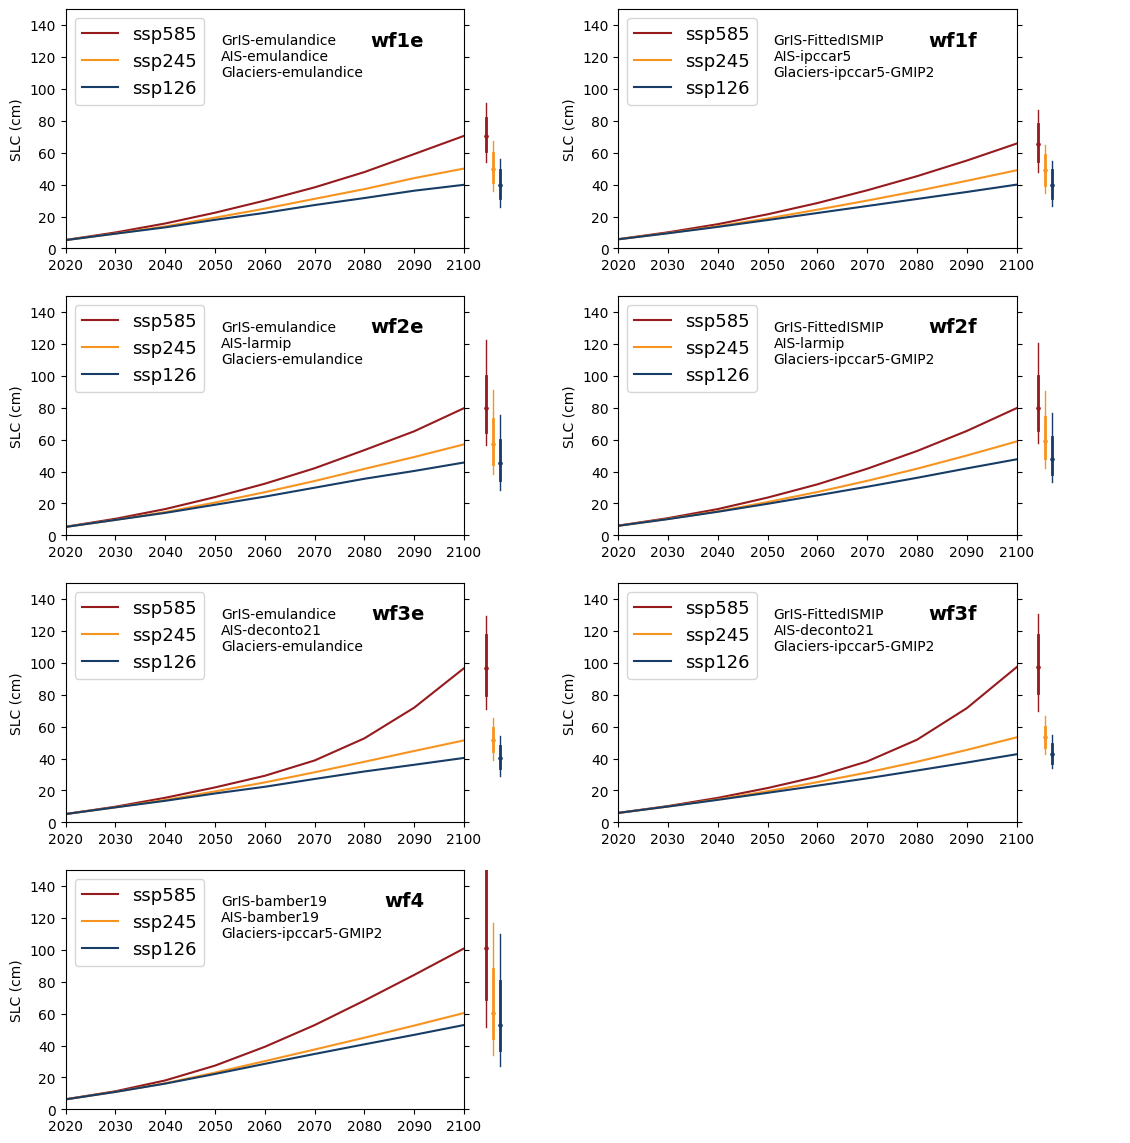

In [12]:
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(35,40), 'figure.dpi':100})
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid00 = grid[0].subgridspec(4, 5)
grid01 = grid[1].subgridspec(4, 5)
#
# Axis Spec.
# Global
xlim  = [2020,2100]
ylim = [0 , 150]
xlim1 = [.1,2]
#
XAX1        = df_ptile.loc[:,"Year"].unique()
SSP         = np.flip(df_ptile.loc[:,"SSP"].unique())
COMPONENT   = df_ptile.loc[:,"Component"].unique()
#MODULE      = df_ptile.loc[:,"Module"].unique()
#
# Subplot Axis.
ax1_wf1e = plt.subplot(grid00[0, :4]); ax2_wf1e = plt.subplot(grid00[0, 4]);
ax1_wf2e = plt.subplot(grid00[1, :4]); ax2_wf2e = plt.subplot(grid00[1, 4]);
ax1_wf3e = plt.subplot(grid00[2, :4]); ax2_wf3e = plt.subplot(grid00[2, 4]);
ax1_wf4  = plt.subplot(grid00[3, :4]); ax2_wf4  = plt.subplot(grid00[3, 4]);
#
ax3_wf1f = plt.subplot(grid01[0, :4]); ax4_wf1f = plt.subplot(grid01[0, 4]);
ax3_wf2f = plt.subplot(grid01[1, :4]); ax4_wf2f = plt.subplot(grid01[1, 4]);
ax3_wf3f = plt.subplot(grid01[2, :4]); ax4_wf3f = plt.subplot(grid01[2, 4]);

dataODD = ['wf1e','wf2e','wf3e','wf4']
dataEVE = ['wf1f','wf2f','wf3f']

#
for ww in WORKFLO:
    # Select subplot axis based on workflow
    if any(x in ww for x in dataODD): 
        ax1 = eval(f'ax1_{ww}');    ax2 = eval(f'ax2_{ww}')
    elif any(x in ww for x in dataEVE):
        ax1 = eval(f'ax3_{ww}');    ax2 = eval(f'ax4_{ww}')
    # X axis for the Right (Bar) Plot.
    XAX2 = np.array([[.2,.2]]) 
    #
    for ss in SSP: # Loop through each SSP
        #
        # Plot Left 
        Yax1 = df_ptile.loc[((df_ptile["Workflow"] == ww) & (df_ptile['SSP'] == ss)),"col_50" ] 
        ax1.plot(XAX1, Yax1, label = ss, color = eval(f'color_{ss}'))
        #
        # Plot Right
        Yax2_1 = df_ptile.loc[((df_ptile["Workflow"] == ww) & (df_ptile['SSP'] == ss) & (df_ptile['Year'] == 2100)),("col_5", "col_95") ].values
        Yax2_2 = df_ptile.loc[((df_ptile["Workflow"] == ww) & (df_ptile['SSP'] == ss) & (df_ptile['Year'] == 2100)),("col_17", "col_83") ].values 
        Yax2_3 = df_ptile.loc[((df_ptile["Workflow"] == ww) & (df_ptile['SSP'] == ss) & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values 
        #
        ax2.plot(XAX2.transpose(), Yax2_1.transpose(), label = ss, color = eval(f'color_{ss}'),linewidth=1,)
        ax2.plot(XAX2.transpose(), Yax2_2.transpose(), label = ss, color = eval(f'color_{ss}'),linewidth=2)
        ax2.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = eval(f'color_{ss}'),ms = 2,mfc='none')
        XAX2 = XAX2+.15
        #
    ax1.tick_params(axis='both', labelsize=10)
    ax1.yaxis.set_ticks_position('both')
    ax1.legend(loc='upper left',prop={'size': 13}); ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax1.set_ylabel("SLC (cm)"); #ax1.grid()
    # WorkFlow Title.
    ax1.text(.9, .91, ww, horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=14,transform=ax1.transAxes)
    ax1.text(.39, .9, '\n'.join(map(str, eval(ww))), horizontalalignment='left',verticalalignment='top',fontsize=10,transform=ax1.transAxes)
    #
    ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
# plt.suptitle('GMD Fig 2: GMSL projections for {one}'.format(one=ss),y=0.91)
# plt.supxlabel('common x label'); plt.supylabel('common y label')
plt.show()

In [13]:
df_ptile.loc[((df_ptile["Workflow"] == 'wf4') & (df_ptile['SSP'] == 'ssp126') & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values

array([[52.85, 52.85]])

In [14]:
df_ptile.loc[((df_ptile["Workflow"] == 'wf4') & (df_ptile['SSP'] == 'ssp585') & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values

array([[100.9, 100.9]])